In [206]:
from __future__ import print_function
import cv2
import numpy as np
from skimage.metrics import structural_similarity
import matplotlib.pyplot as plt
from cv2 import cv2 as cv2
from PIL import Image
import imagehash
from moviepy.editor import VideoFileClip


In [233]:
videoCapture = cv2.VideoCapture('C:/Users/11488/Desktop/zju/goodtest2.mp4')

In [234]:
up=0
down=0
new_scene=[]

In [235]:
fps = videoCapture.get(cv2.CAP_PROP_FPS)

In [236]:
fps

23.846153846153847

In [237]:
success, img1= videoCapture.read()
img1.shape

(960, 544, 3)

In [238]:
success

True

In [239]:
for i in range(30):
    success, img2 = videoCapture.read()

In [240]:
success, img2 = videoCapture.read()

In [102]:
i = 0
while i<37:
    success, img2 = videoCapture.read()
    i+=1

In [103]:
img2.shape

(960, 544, 3)

In [104]:
orb = cv2.ORB_create(5000)


In [223]:
img1 = img1[80:img1.shape[0]-55,:]
img2= img2[80:img2.shape[0]-55,:]
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [224]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

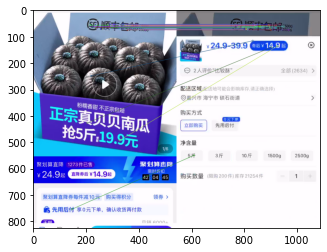

In [225]:
matches = bf.knnMatch(des1, trainDescriptors = des2, k = 2)
good = [m for (m,n) in matches if m.distance < 0.65*n.distance]
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good[int(0.75*len(good)):int(1*len(good))],None,flags=2)
cv2.imwrite('test3.jpg',img3)
plt.imshow(img3)
plt.show()

In [227]:
def _Recheck(src_pts,dst_pts,fig_shape):
    s=[]
    d=[]
    for i in range(src_pts.shape[0]):
        sc=src_pts[i]
        ds=dst_pts[i]
        dx=abs(sc[0][0]-ds[0][0])
        dy=abs(sc[0][1]-ds[0][1])
        if dx/fig_shape[1]<0.3 and dy/fig_shape[0]<0.3:
            s.append(sc)
            d.append(ds)
    s=np.array(s)
    d=np.array(d)
#     print(s.shape)
    return s,d

In [228]:

if len(good)>min_match_count:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good[int(0.75*len(good)):int(1*len(good))]]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good[int(0.75*len(good)):int(1*len(good))]]).reshape(-1,1,2)
        
    src_pts,dst_pts=_Recheck(src_pts,dst_pts,img1.shape)
       
        
res=[]
for i in range(src_pts.shape[0]):
    s=src_pts[i]
    d=dst_pts[i]
    dy=abs(s[0][1]-d[0][1])
    res.append(dy)
res.sort()

In [229]:
len(res)

38

In [230]:
np.mean(res)


8.858275

In [231]:
np.mean(res[1*int(len(res)/3):-1])

5.308417

In [232]:
np.mean(res[2*int(len(res)/3):-1])

10.208494

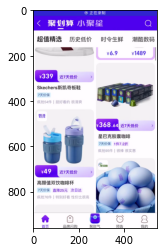

In [12]:
plt.imshow(img2)

In [26]:
matches = bf.knnMatch(des1, trainDescriptors = des2, k = 2)

In [27]:
good = [m for (m,n) in matches if m.distance < 0.35*n.distance]
len(good)


1279

In [31]:
gap_factor=5 ## num of detection within each second
match_ratio=0.3 ##the distance ratio thershold between best match and second match
good_match_rate=0.7 ##the rate of matches to be chosen in all
ransacReprojThreshold=6
min_match_count=5
def _AlignImages(img1,img2):
    # initiate ORB detector
    orb = cv2.ORB_create(5000)
    
    ##check bilateral banner, eliminate stick part
#     up_idx,down_idx=_SplitImage(img1,img2)
#     img1 = img1[up_idx:down_idx,:]
#     img2= img2[up_dx:down_idx,:]
    img1 = img1[80:img1.shape[0]-70,:]
    img2 = img2[80:img2.shape[0]-70,:]
    
    ##find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1,None)
    kp2, des2 = orb.detectAndCompute(img2,None)
    
    ##match with Brute-Force
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    ##find best 2 matches for each kp
    matches = bf.knnMatch(des1, trainDescriptors = des2, k = 2)
    ##ratio test
    good = [m for (m,n) in matches if m.distance < match_ratio*n.distance]
    ##sort and choose the best part of matches
#     good = sorted(good, key = lambda x:x.distance)
#     good = good[:int(len(good) * good_match_rate)]

    
    if len(good)>min_match_count:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good[:19] ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good[:19] ]).reshape(-1,1,2)
        ##find (3x3) transform matrix
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,ransacReprojThreshold)
        print(M)

In [32]:
_AlignImages(img2,img1)

[[ 1.00000000e+00  7.63067156e-15 -2.33832263e-13]
 [-2.31460139e-15  1.00000000e+00  5.60000000e+01]
 [-2.09024356e-17  7.96201198e-17  1.00000000e+00]]


In [46]:
for i in match[:1]:
   
    print(kp1[i.queryIdx].pt)
    print(kp2[i.trainIdx].pt)
   

(637.2000122070312, 156.0)
(85.20000457763672, 156.0)


In [47]:
(a-b).shape

NameError: name 'a' is not defined

In [48]:
(a-b).sum(axis=0)[0]

NameError: name 'a' is not defined

In [49]:
[int(len(a)/2)]

NameError: name 'a' is not defined

In [50]:
kp1[6].pt

(496.0, 58.0)

In [51]:
import copy

In [52]:
keyp_without_size = copy.copy(img1)
keyp_with_size = copy.copy(img1)

In [53]:
cv2.drawKeypoints(img1, kp1, keyp_without_size, color = (0, 255, 0))

array([[[250, 255, 251],
        [250, 255, 251],
        [250, 255, 251],
        ...,
        [250, 254, 255],
        [250, 253, 255],
        [250, 254, 255]],

       [[250, 255, 251],
        [250, 255, 251],
        [250, 255, 251],
        ...,
        [250, 253, 255],
        [250, 253, 255],
        [250, 253, 255]],

       [[250, 255, 251],
        [250, 255, 251],
        [250, 255, 251],
        ...,
        [250, 253, 255],
        [250, 253, 255],
        [250, 253, 255]],

       ...,

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]]

In [54]:
cv2.drawKeypoints(img1, kp1, keyp_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

array([[[250, 255, 251],
        [250, 255, 251],
        [250, 255, 251],
        ...,
        [250, 254, 255],
        [250, 253, 255],
        [250, 254, 255]],

       [[250, 255, 251],
        [250, 255, 251],
        [250, 255, 251],
        ...,
        [250, 253, 255],
        [250, 253, 255],
        [250, 253, 255]],

       [[250, 255, 251],
        [250, 255, 251],
        [250, 255, 251],
        ...,
        [250, 253, 255],
        [250, 253, 255],
        [250, 253, 255]],

       ...,

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]]

True

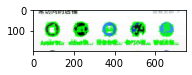

In [55]:
cv2.imwrite('test1.jpg',keyp_without_size)
plt.subplot(121)
# keyp_without_size = cv2.resize(keyp_without_size,None,fx=4,fy=4)
# plt.title('Keypoints Without Size or Orientation')
plt.imshow(keyp_without_size)
cv2.imwrite('test2.jpg',keyp_with_size)
# # Display the image with the keypoints with size and orientation
# plt.subplot(122)
# plt.title('Keypoints With Size and Orientation')
# plt.imshow(keyp_with_size)
# plt.show()


In [56]:
up=0
down=0
left=0
right=0

In [69]:
img1.shape

(1334, 750, 3)

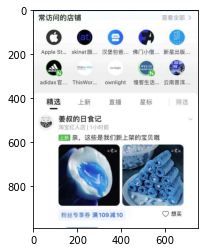

In [79]:
plt.imshow(img1)

In [85]:
gap_factor=5 ## num of detection within each second
match_ratio=0.3 ##the distance ratio thershold between best match and second match
good_match_rate=0.7 ##the rate of matches to be chosen in all
ransacReprojThreshold=5
min_match_count=5
def _AlignImages(img1,img2):
    # initiate ORB detector
    orb = cv2.ORB_create(5000)
    
    ##check bilateral banner, eliminate stick part
#     up_idx,down_idx=_SplitImage(img1,img2)
#     img1 = img1[up_idx:down_idx,:]
#     img2= img2[up_dx:down_idx,:]
    img1 = img1[210:1200,]
    img2 = img2[210:1200,]
    
    ##find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1,None)
    kp2, des2 = orb.detectAndCompute(img2,None)
    
    ##match with Brute-Force
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    ##find best 2 matches for each kp
    matches = bf.knnMatch(des1, trainDescriptors = des2, k = 2)
    ##ratio test
    good = [m for (m,n) in matches if m.distance < match_ratio*n.distance]
    ##sort and choose the best part of matches
#     good = sorted(good, key = lambda x:x.distance)
#     good = good[:int(len(good) * good_match_rate)]
    
    if len(good)>min_match_count:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        ##find (3x3) transform matrix
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,ransacReprojThreshold)
        print(M)
        t_x = M[0][2]
        t_y = M[1][2]
        print(t_x,t_y)
        _Pattern(t_x,t_y)
        
        
        
def _Pattern(t_x,t_y):
    if abs(t_x)<1 and abs(t_y)<1:
        print('stop')
        return 
    elif abs(t_x/t_y)>20:
        print('left,right')
        if (t_x>0):
            print('right')
        else:
            print('left')
        return
    elif abs(t_y/t_x)>20:
#         print('up,down')
        if (t_y>0):
            print('down')
        else:
            print('up')
        return 
        
    

In [94]:
import os
img1=cv2.imread(os.path.abspath(os.curdir)+'/6.jpg')
img2=cv2.imread(os.path.abspath(os.curdir)+'/5.jpg')


In [95]:
# plt.imshow(img1)


In [96]:
# plt.imshow(img2)

In [97]:
_AlignImages(img1,img2)

[[ 1.00217009e+00 -5.75643484e-04  3.39896640e+02]
 [ 3.24311048e-03  9.98550301e-01  2.86053372e-02]
 [ 5.39027348e-06 -2.26625554e-06  1.00000000e+00]]
339.8966401944644 0.028605337243081088
left,right
right


In [ ]:
orb = cv2.ORB_create(5000)

In [ ]:
img1 = img1[80:440,:]
img2= img2[80:440,:]
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [111]:
print(img2.shape)

(820, 544, 3)


In [115]:
img_2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

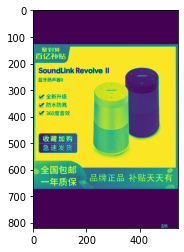

In [117]:
plt.imshow(img_2)

In [124]:
sum1=img_2.sum(axis=1)

In [125]:
c=0
for i in sum1:
    if i ==0:
        c+=1

In [128]:
c/sum1.shape[0]

0.28536585365853656

## state_machine test

In [2]:
from pysm import State, StateMachine, Event


None


In [7]:
test()

None


In [8]:
from statemachine import StateMachine, State

class TrafficLightMachine(StateMachine):
    green = State('Green', initial=True)
    yellow = State('Yellow')
    red = State('Red')

    slowdown = green.to(yellow)
    sel=green.to(green)
    sel=yellow.to(yellow)
    stop = yellow.to(red)
    go = red.to(green)

In [9]:
traffic_light = TrafficLightMachine()

In [10]:
traffic_light.current_state

State('Green', identifier='green', value='green', initial=True)

In [115]:
a=np.random.randint(0,10,size=[10,1,2])

In [117]:
b=[]
for i in range(10):
    
b=np.array(b)

In [120]:
b

array([[[9, 6]],

       [[7, 1]],

       [[1, 8]],

       [[0, 8]],

       [[6, 1]],

       [[9, 6]],

       [[0, 0]],

       [[7, 8]],

       [[1, 9]],

       [[8, 5]]])

In [136]:
c=b[0]
c

array([[9, 6]])

In [137]:
c[0][0]

array([9, 6])